In [1]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from matplotlib import pyplot as plt

# 定義梯度下降批量
batch_size = 256
# 定義分類數量
num_classes = 10
# 定義訓練週期
epochs = 15

# 定義圖像寬、高
img_rows, img_cols = 28, 28

# 載入 MNIST 訓練資料
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 保留原始資料，供 cross tab function 使用
y_test_org = y_test

# channels_first: 色彩通道(R/G/B)資料(深度)放在第2維度，第3、4維度放置寬與高
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else: # channels_last: 色彩通道(R/G/B)資料(深度)放在第4維度，第2、3維度放置寬與高
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

# 轉換色彩 0~255 資料為 0~1
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# y 值轉成 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

Using TensorFlow backend.


Using TensorFlow backend.


Instructions for updating:
If using Keras pass *_constraint arguments to layers.


Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 63s 1ms/step - loss: 0.3364 - accuracy: 0.8951 - val_loss: 0.0799 - val_accuracy: 0.9758
Epoch 2/15
60000/60000 [==============================] - 64s 1ms/step - loss: 0.1059 - accuracy: 0.9682 - val_loss: 0.0515 - val_accuracy: 0.9837
Epoch 3/15
60000/60000 [==============================] - 63s 1ms/step - loss: 0.0758 - accuracy: 0.9778 - val_loss: 0.0452 - val_accuracy: 0.9848
Epoch 4/15
60000/60000 [==============================] - 63s 1ms/step - loss: 0.0645 - accuracy: 0.9809 - val_loss: 0.0402 - val_accuracy: 0.9865
Epoch 5/15
60000/60000 [==============================] - 61s 1ms/step - loss: 0.0540 - accuracy: 0.9838 - val_loss: 0.0313 - val_accuracy: 0.9893
Epoch 6/15
60000/60000 [==============================] - 61s 1ms/step - loss: 0.0458 - accuracy: 0.9859 - val_loss: 0.0332 - val_ac

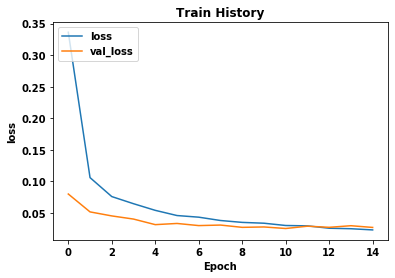

In [1]:
#####---------------------------------------尚未修改的模型---------------------------------------#####

# 建立簡單的線性執行的模型
model = Sequential()
# 建立卷積層，filter=32,即 output space 的深度, Kernal Size: 3x3, activation function 採用 relu
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
# 建立卷積層，filter=64,即 output size, Kernal Size: 3x3, activation function 採用 relu
model.add(Conv2D(64, (3, 3), activation='relu'))
# 建立池化層，池化大小=2x2，取最大值
model.add(MaxPooling2D(pool_size=(2, 2)))
# Dropout層隨機斷開輸入神經元，用於防止過度擬合，斷開比例:0.25
model.add(Dropout(0.25))
# Flatten層把多維的輸入一維化，常用在從卷積層到全連接層的過渡。
model.add(Flatten())
# 全連接層: 128個output
model.add(Dense(128, activation='relu'))
# Dropout層隨機斷開輸入神經元，用於防止過度擬合，斷開比例:0.5
model.add(Dropout(0.5))
# 使用 softmax activation function，將結果分類
model.add(Dense(num_classes, activation='softmax'))

# 編譯: 選擇損失函數、優化方法及成效衡量方式
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

# 進行訓練, 訓練過程會存在 train_history 變數中
train_history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
#儲存訓練架構及結果
model.save('my_model_cnn.h5')

# 顯示損失函數、訓練成果(分數)
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


plt.plot(train_history.history['loss'])  
plt.plot(train_history.history['val_loss'])  
plt.title('Train History')  
plt.ylabel('loss')  
plt.xlabel('Epoch')  
plt.legend(['loss', 'val_loss'], loc='upper left')  
plt.show()

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 45s 754us/step - loss: 1.5771 - accuracy: 0.5232 - val_loss: 1.0010 - val_accuracy: 0.6687
Epoch 2/15
60000/60000 [==============================] - 45s 745us/step - loss: 0.7392 - accuracy: 0.7682 - val_loss: 0.3721 - val_accuracy: 0.8975
Epoch 3/15
60000/60000 [==============================] - 44s 740us/step - loss: 0.4555 - accuracy: 0.8610 - val_loss: 0.2690 - val_accuracy: 0.9221
Epoch 4/15
60000/60000 [==============================] - 44s 740us/step - loss: 0.3370 - accuracy: 0.9008 - val_loss: 0.2273 - val_accuracy: 0.9327
Epoch 5/15
60000/60000 [==============================] - 44s 741us/step - loss: 0.2882 - accuracy: 0.9154 - val_loss: 0.1725 - val_accuracy: 0.9492
Epoch 6/15
60000/60000 [==============================] - 46s 759us/step - loss: 0.2351 - accuracy: 0.9316 - val_loss: 0.1387 - val_accuracy: 0.9580
Epoch 7/15
60000/60000 [==============================] 

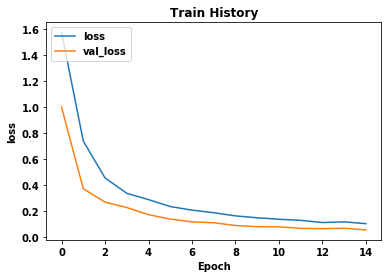

In [4]:
#####---------------------------------------僅修改batch_size 256 -> 1024---------------------------------------#####

# 建立簡單的線性執行的模型
model = Sequential()
# 建立卷積層，filter=32,即 output space 的深度, Kernal Size: 3x3, activation function 採用 relu
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
# 建立卷積層，filter=64,即 output size, Kernal Size: 3x3, activation function 採用 relu
model.add(Conv2D(64, (3, 3), activation='relu'))
# 建立池化層，池化大小=2x2，取最大值
model.add(MaxPooling2D(pool_size=(2, 2)))
# Dropout層隨機斷開輸入神經元，用於防止過度擬合，斷開比例:0.25
model.add(Dropout(0.25))
# Flatten層把多維的輸入一維化，常用在從卷積層到全連接層的過渡。
model.add(Flatten())
# 全連接層: 128個output
model.add(Dense(128, activation='relu'))
# Dropout層隨機斷開輸入神經元，用於防止過度擬合，斷開比例:0.5
model.add(Dropout(0.5))
# 使用 softmax activation function，將結果分類
model.add(Dense(num_classes, activation='softmax'))

# 編譯: 選擇損失函數、優化方法及成效衡量方式
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

# 進行訓練, 訓練過程會存在 train_history 變數中
train_history = model.fit(x_train, y_train,
          batch_size=4096,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
#儲存訓練架構及結果
model.save('my_model_cnn.h5')

# 顯示損失函數、訓練成果(分數)
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


plt.plot(train_history.history['loss'])  
plt.plot(train_history.history['val_loss'])  
plt.title('Train History')  
plt.ylabel('loss')  
plt.xlabel('Epoch')  
plt.legend(['loss', 'val_loss'], loc='upper left')  
plt.show()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 30s 507us/step - loss: 0.6748 - accuracy: 0.8102 - val_loss: 0.2125 - val_accuracy: 0.9405
Epoch 2/10
60000/60000 [==============================] - 30s 502us/step - loss: 0.1781 - accuracy: 0.9486 - val_loss: 0.1086 - val_accuracy: 0.9677
Epoch 3/10
60000/60000 [==============================] - 30s 501us/step - loss: 0.1098 - accuracy: 0.9677 - val_loss: 0.0713 - val_accuracy: 0.9786
Epoch 4/10
60000/60000 [==============================] - 30s 497us/step - loss: 0.0865 - accuracy: 0.9747 - val_loss: 0.0586 - val_accuracy: 0.9817
Epoch 5/10
60000/60000 [==============================] - 30s 501us/step - loss: 0.0721 - accuracy: 0.9785 - val_loss: 0.0483 - val_accuracy: 0.9852
Epoch 6/10
60000/60000 [==============================] - 30s 503us/step - loss: 0.0630 - accuracy: 0.9816 - val_loss: 0.0

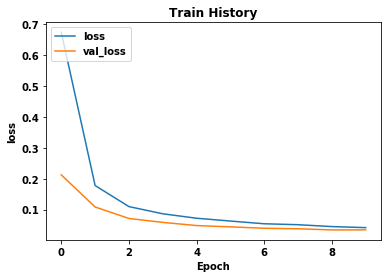

In [2]:
#####---------------------------------------改良版模型---------------------------------------#####
model2=Sequential()
# 第一層conv2D更改Mask大小從3->9
model2.add(Conv2D(32, kernel_size=(9, 9),activation='relu',input_shape=input_shape))

model2.add(Conv2D(64, (3, 3), activation='relu'))

# 建立池化層，池化大小=2x2，取最大值
model2.add(MaxPooling2D(pool_size=(2, 2)))
# Dropout層隨機斷開輸入神經元，用於防止過度擬合，斷開比例:0.25
model2.add(Dropout(0.25))
# Flatten層把多維的輸入一維化，常用在從卷積層到全連接層的過渡。
model2.add(Flatten())
# 更改數值成0.5->0.25
model2.add(Dropout(0.25))
# 使用 softmax activation function，將結果分類
model2.add(Dense(num_classes, activation='softmax'))

# 更改optimizer Adadelta->Adam
model2.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

# 更改batch size 256->1024 epochs 15->10
train_history = model2.fit(x_train, y_train,
          batch_size=1024,
          epochs=10,
          #verbose=1,
          validation_data=(x_test, y_test))
#儲存訓練架構及結果
#model.save('my_model_cnn.h5')

# 顯示損失函數、訓練成果(分數)
score = model2.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


plt.plot(train_history.history['loss'])  
plt.plot(train_history.history['val_loss'])  
plt.title('Train History')  
plt.ylabel('loss')  
plt.xlabel('Epoch')  
plt.legend(['loss', 'val_loss'], loc='upper left')  
plt.show()

In [9]:
model2.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 20, 20, 32)        2624      
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 18, 18, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 9, 9, 64)          0         
_________________________________________________________________
dropout_11 (Dropout)         (None, 9, 9, 64)          0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 5184)              0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 5184)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 10)               

In [4]:
import tensorflow as tf
tf.test.is_gpu_available(
    cuda_only=False, min_cuda_compute_capability=None
)

False